In [1]:
import numpy as np
import gym
from gym import wrappers
import time
import seaborn
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import colors

In [2]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action =np.random.choice(env.action_space.n, p=policy[obs])
        obs, reward, done,_ = env.step(action)
        #obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [3]:
def value_iteration(env, theta=0.0001, gamma=1.0, render=False):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.
    """
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        #q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += 1*prob * (reward + gamma * V[next_state])
        return A
    
    err=[]
    k=[]
    t=[]
    V = np.zeros(env.nS)
    i = 0
    totaltime=0
    while True:
        # Stopping condition
        delta = 0
        start=time.time()
        # Update each state...
        for s in range(env.nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value 
        end=time.time()    
        ti=end-start
        t.append(ti)
        #print(t)
        err.append(delta)
        k.append(i)
        i=i+1
        totaltime=np.sum(t)
        # Check if we can stop 
        if delta < theta:
            print ('Value-iteration converged at iteration# %d.' %(i))
            if render==True:
                err=np.array(err)
                k=np.array(k)
                t=np.array(t)
                
                plt.figure(figsize=[15,6])
                plt.subplot(1,2,1)
                line1, = plt.plot(err,color='r',label='error')
                plt.ylabel('error')
                plt.xlabel('iteration')
                plt.subplot(1,2,2)
                line2,=plt.plot(t,color='g',label='time')
                #plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
                plt.ylabel('time')
                plt.xlabel('iteration')
                plt.show()
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0
    
    return policy, V, totaltime

In [4]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [5]:
def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

In [6]:
env_name  = 'FrozenLake-v1'
gamma = 0.9
env = gym.make(env_name, is_slippery=False)
env = env.unwrapped

In [7]:
env.unwrapped.P[14][2] # p(s14,0|s14,a2)=1/3; p(s15,1|s14,a2)=1/3; p(s10,0|s14,a2)=1/3

[(1.0, 15, 1.0, True)]

In [8]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [9]:
random_policy = np.ones((env.unwrapped.nS, env.unwrapped.nA))/env.unwrapped.nA
print(random_policy)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [10]:
episode_rewards=[run_episode(env, random_policy,gamma=gamma) for _ in range(100)]

In [11]:
print('The average reward for random policy is {:.2f}'.format(np.mean(episode_rewards)))

The average reward for random policy is 0.01


The expectation of the rewards with random policy is close to 0. This means random policy can't almost reach the target location successfully

Value-iteration converged at iteration# 7.


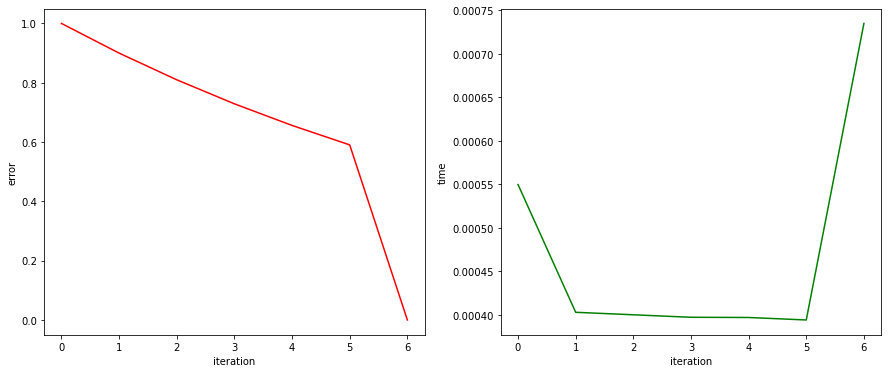

In [12]:
policy, v, _ = value_iteration(env,theta=1e-20, gamma=gamma, render=True)

In [13]:
policy1 = extract_policy(v,gamma=gamma)
len(policy1)

16

In [14]:
policy1

array([1., 2., 1., 0., 1., 0., 1., 0., 2., 1., 1., 0., 0., 2., 2., 0.])

In [15]:
ps=[]
pscha=[]
for elem in policy1:
    ps.append(elem)
    if elem==1.0:
        pscha.append('D')
    elif elem==2.0:
        pscha.append('R')
    elif elem==0.0:
        pscha.append('L')
    else:
        pscha.append('U')

reshaped_policy=np.reshape(pscha,(4,4))
print(reshaped_policy)
#print(tabulate(reshaped_policy,tablefmt='latex'))

[['D' 'R' 'D' 'L']
 ['D' 'L' 'D' 'L']
 ['R' 'D' 'D' 'L']
 ['L' 'R' 'R' 'L']]


In [16]:
data=np.ones([4,4])*20
data[0,0]=10
data[1,1]=7
data[1,3]=7
data[3,0]=7
data[3,3]=0

In [17]:
# create discrete colormap
cmap = colors.ListedColormap(['green', 'red','orange','blue'])
bounds = [0,5,10,15,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

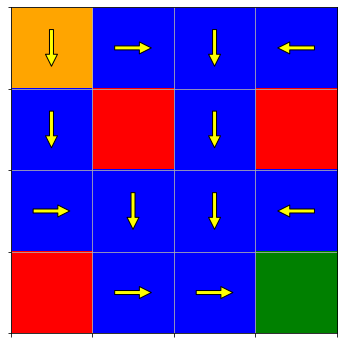

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(data, cmap=cmap)

# draw gridlines
ax.set_xticks(np.arange(-.5, 4.5, 1));
ax.set_yticks(np.arange(-.5, 4.5, 1));
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])

for iy in range(4):
    for ix in range(4):
    #print(x)
        if iy==1 and ix==1:
            continue
        if iy==1 and ix==3:
            continue
        if iy==3 and ix==0:
            continue
        if iy==3 and ix==3:
            continue
        if reshaped_policy[iy,ix]=='D':
            #ax.text(x[1], x[0], policy[x], fontsize=25,      color='blue')
            ax.annotate('', xy=(ix, iy+0.25), xytext=(ix, iy-0.25),
                arrowprops=dict(facecolor='yellow', shrink=0.05))
        elif reshaped_policy[iy,ix]=='L':
            #ax.text(x[1], x[0], policy[x], fontsize=25,      color='green')
            ax.annotate('', xy=(ix-0.25, iy), xytext=(ix+0.25, iy),
                arrowprops=dict(facecolor='yellow', shrink=0.05))
        elif reshaped_policy[iy,ix]=='U':  
            #ax.text(x[1], x[0], policy[x], fontsize=25,      color='blueviolet')
            ax.annotate('', xy=(ix, iy-0.25), xytext=(ix, iy+0.25),
                arrowprops=dict(facecolor='yellow', shrink=0.05))
        else:
            ax.annotate('', xy=(ix+0.25, iy), xytext=(ix-0.25, iy),
                arrowprops=dict(facecolor='yellow', shrink=0.05))
            #ax.text(x[1], x[0], policy[x], fontsize=25,      color='k')


            #print(reshaped_policy[iy,ix])


In [19]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

In [20]:
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=left, 1=down, 2=right, 3=up):")
print(np.reshape(np.argmax(policy, axis=1), [4,4]))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape([4,4]))
print("")

Policy Probability Distribution:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=left, 1=down, 2=right, 3=up):
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Value Function:
[0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]

Reshaped Grid Value Function:
[[0.59049 0.6561  0.729   0.6561 ]
 [0.6561  0.      0.81    0.     ]
 [0.729   0.81    0.9     0.     ]
 [0.      0.9     1.      0.     ]]



In [21]:
len(v)

16

Text(0.5, 1.0, 'Value at each location')

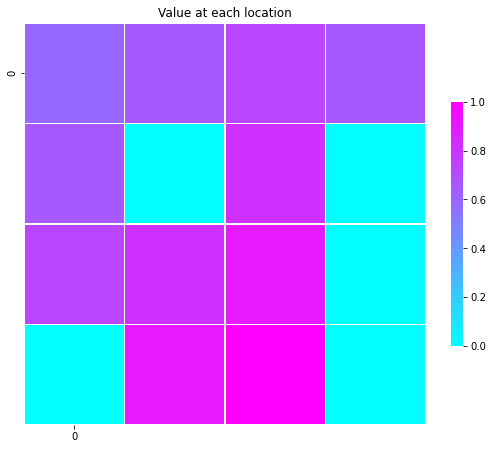

In [22]:
x = v.reshape(4, 4)
f, ax = plt.subplots(figsize=(9, 9))
cmap=seaborn.diverging_palette(0, 200, s=50, l=77,
                                  n=90, center="dark", as_cmap=True)
#cmap = seaborn.diverging_palette(220, 20, as_cmap=True)
ax = seaborn.heatmap(x, cmap='cool',square=True, xticklabels=4+1, yticklabels=4+1,
       linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Value at each location')

In [23]:
s=[]
for i in range(100):
    _,_,t=value_iteration(env, gamma = gamma)
    s.append(t)

Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-iteration converged at iteration# 7.
Value-itera

In [24]:
from scipy.stats import norm
s=np.array(s)
(mu, sigma) = norm.fit(s)
#formatted_mu = "{:.2f}".format(mu)
#formatted_sigma = "{:.2f}".format(sigma)
#print(['mu is {}' %mu, ' sigma is {}'%sigma])
print("mu is {:.5f}, sigma is {:.5f}".format(mu, sigma))

mu is 0.00118, sigma is 0.00070


Histogram of steps: μ=0.00118, sigma=0.00070


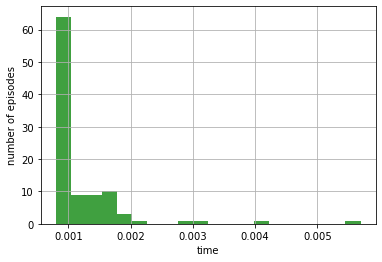

In [26]:
n, bins, patches = plt.hist(s, 20, density=0, facecolor='green', alpha=0.75)
plt.xlabel('time')
plt.ylabel('number of episodes')
#plt.title('Histogram of steps: μ=' + str(mu) + ' sigma=' + str(sigma))
print("Histogram of steps: μ={:.5f}, sigma={:.5f}".format(mu, sigma))
plt.grid(True)
plt.show()